<a href="https://colab.research.google.com/github/Meghashyamt/Telecom-Project/blob/master/Telecom_Project_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/Meghashyamt/Telecom-Project.git
  

In [0]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#import keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

from sklearn.preprocessing import scale, normalize

In [0]:
#import data
data = pd.read_csv("Telecom-Project/telecom_churn_data.csv")

In [0]:
#data.loc[0]=['State','Account Length','Area Code','Phone','International Plan','VMail Plan','VMail Message','Day Mins','Day calls','Day charge','Eve Mins','Eve calls','Eve Charge','Night Mins','Night calls','Night charge','International Mins','International calls','International charge','Custserve calls','Churn']

In [0]:
data.head()

,State,Account Length,Area code,Phone,International Plan,Vmail plan,Vmail Message,Day mins,Day calls,Day charge,Eve mins,Eve calls,Eve charge,Night mins,Night calls,Night charge,International mins,International calls,International charge,Custserve calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [0]:
#information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
State                   4617 non-null object
Account Length          4617 non-null int64
Area code               4617 non-null int64
Phone                   4617 non-null object
International Plan      4617 non-null object
Vmail plan              4617 non-null object
Vmail Message           4617 non-null int64
Day mins                4617 non-null float64
Day calls               4617 non-null int64
Day charge              4617 non-null float64
Eve mins                4617 non-null float64
Eve calls               4617 non-null int64
Eve charge              4617 non-null float64
Night mins              4617 non-null float64
Night calls             4617 non-null int64
Night charge            4617 non-null float64
International mins      4617 non-null float64
International calls     4617 non-null int64
International charge    4617 non-null float64
Custserve calls         4617 non-null

In [0]:
#data = normalize(data)

In [0]:
#Adding new column and changing to binary
data['Churn-Flag']=(data['Churn']== True).astype(int)

In [0]:
data.head(20)

,State,Account Length,Area code,Phone,International Plan,Vmail plan,Vmail Message,Day mins,Day calls,Day charge,Eve mins,Eve calls,Eve charge,Night mins,Night calls,Night charge,International mins,International calls,International charge,Custserve calls,Churn,Churn-Flag
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0,0
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0,0
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0,0
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0,0
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0,0


In [0]:
data=data.drop("Phone", axis=1)

In [0]:
data.head(2)

,State,Account Length,Area code,International Plan,Vmail plan,Vmail Message,Day mins,Day calls,Day charge,Eve mins,Eve calls,Eve charge,Night mins,Night calls,Night charge,International mins,International calls,International charge,Custserve calls,Churn,Churn-Flag
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0,0


In [0]:
#import required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
#slicing X and y
X=data.iloc[:,1:19]
y=data.iloc[:,20]

In [0]:
X=pd.get_dummies(X,drop_first=True)

In [0]:
X.head()

,Account Length,Area code,Vmail Message,Day mins,Day calls,Day charge,Eve mins,Eve calls,Eve charge,Night mins,Night calls,Night charge,International mins,International calls,International charge,Custserve calls,International Plan_ yes,Vmail plan_ yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0


In [0]:
#Model
clf = Sequential()

In [0]:
#importing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
#training and test
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [0]:
sc = StandardScaler()

In [0]:
#Transforming
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [0]:
#Hidden layers , input, units
clf.add(Dense(units=6, activation='relu', input_dim=18))
clf.add(Dropout(0.2))
clf.add(Dense(units=9, activation='relu'))
clf.add(Dropout(0.2))
#clf.add(Dense(units=6, activation='relu'))
clf.add(Dense(units= 1, activation='sigmoid'))

In [0]:
#compiling
clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
#Fit the model
m=clf.fit(X_train,y_train, batch_size=32, epochs=100, validation_split=0.1)


Train on 3323 samples, validate on 370 samples
Epoch 1/100
3323/3323 [==============================] - 2s 595us/step - loss: 0.5892 - acc: 0.8023 - val_loss: 0.5320 - val_acc: 0.8486
Epoch 2/100
3323/3323 [==============================] - 1s 211us/step - loss: 0.4862 - acc: 0.8537 - val_loss: 0.4558 - val_acc: 0.8486
Epoch 3/100
3323/3323 [==============================] - 1s 189us/step - loss: 0.4380 - acc: 0.8565 - val_loss: 0.4271 - val_acc: 0.8486
Epoch 4/100
3323/3323 [==============================] - 1s 201us/step - loss: 0.4118 - acc: 0.8574 - val_loss: 0.4133 - val_acc: 0.8486
Epoch 5/100
3323/3323 [==============================] - 1s 222us/step - loss: 0.4037 - acc: 0.8574 - val_loss: 0.4023 - val_acc: 0.8486
Epoch 6/100
3323/3323 [==============================] - 1s 195us/step - loss: 0.3961 - acc: 0.8577 - val_loss: 0.3920 - val_acc: 0.8486
Epoch 7/100
3323/3323 [==============================] - 1s 219us/step - loss: 0.3783 - acc: 0.8571 - val_loss: 0.3837 - val_acc: 0

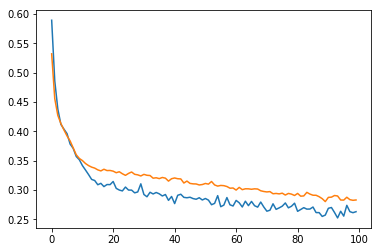

In [0]:
#Plotting
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])

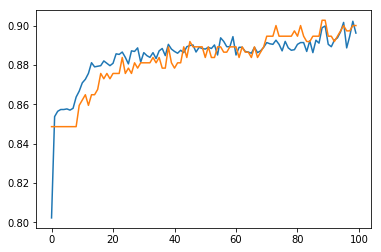

In [0]:

plt.plot(m.history['acc'])
plt.plot(m.history['val_acc'])

In [0]:
#Evaluating
score= clf.evaluate(X_test, y_test)


924/924 [==============================] - 0s 98us/step


In [0]:
score

[0.22351585902692953, 0.914502165018222]

In [0]:
sum(y_train == 0)


3164

In [0]:
sum(y_test == 1)


127

In [0]:
#ML Deployment
from sklearn.externals import joblib
joblib.dump(clf,'TelecomANN.ml')

['TelecomANN.ml']